## multiple Linear Regression
- developer: mehdi sahraei
- [link github](https://github.com/mehdisahraeei)

### Importing Needed packages


In [204]:
import joblib
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data with pandas
- taking a look at the dataset and analyzing data

In [205]:
df = pd.read_csv("split_with_timestep.csv")

df.head() #View the beginning of the data
#tail is used for Viewing the end of the data

,Unnamed: 0,x1,x2,x3,x4,x5,y
0,0,302.00,293.96,290.91,299.10,323.29,309.80
1,1,293.96,290.91,299.10,323.29,309.80,315.74
2,2,290.91,299.10,323.29,309.80,315.74,323.42
3,3,299.10,323.29,309.80,315.74,323.42,327.24
4,4,323.29,309.80,315.74,323.42,327.24,330.79


### Data Exploration

In [206]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,y
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,1172.567558,1173.152286,1173.755442,1174.354844,1174.950263,1175.511353
std,646.776623,1120.985121,1120.872414,1120.762606,1120.649268,1120.538336,1120.426357
min,0.000000,83.760000,83.760000,83.760000,83.760000,83.760000,83.760000
25%,559.750000,229.932500,229.932500,229.932500,229.932500,229.932500,229.932500
50%,1119.500000,678.415000,680.100000,680.455000,680.820000,681.960000,683.435000
75%,1679.250000,1816.892500,1816.892500,1816.892500,1816.892500,1816.892500,1816.892500
max,2239.000000,4807.980000,4807.980000,4807.980000,4807.980000,4807.980000,4807.980000


### A more concise view of the data

In [207]:
cdf = df[['x1','x2','x3','x4','x5','y']]
cdf.head(10)

,x1,x2,x3,x4,x5,y
0,302.00,293.96,290.91,299.10,323.29,309.80
1,293.96,290.91,299.10,323.29,309.80,315.74
2,290.91,299.10,323.29,309.80,315.74,323.42
3,299.10,323.29,309.80,315.74,323.42,327.24
4,323.29,309.80,315.74,323.42,327.24,330.79
5,309.80,315.74,323.42,327.24,330.79,348.13
6,315.74,323.42,327.24,330.79,348.13,346.00
7,323.42,327.24,330.79,348.13,346.00,374.70
8,327.24,330.79,348.13,346.00,374.70,385.93
9,330.79,348.13,346.00,374.70,385.93,384.79


### data histogram

- For example, if the cylinder value be 4, There are 400 data in the dataset, whose cylinder is equal to 4

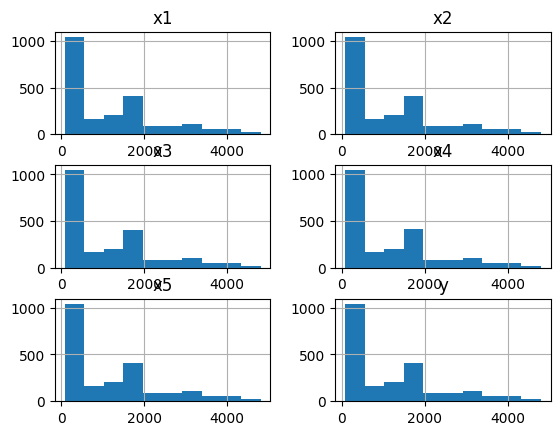

In [208]:
df_hist = cdf[['x1','x2','x3','x4','x5','y']]
df_hist.hist()
plt.show()

### drawing plot and scatter

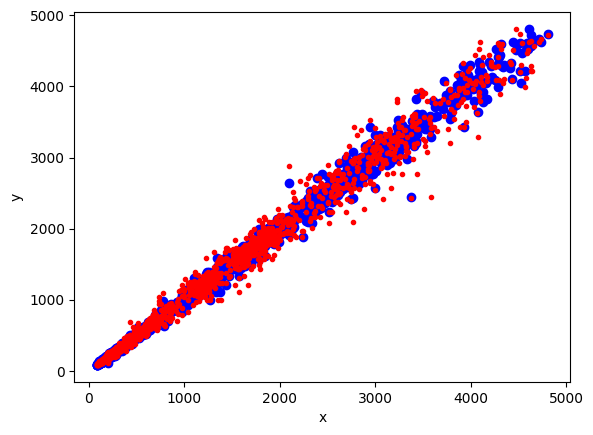

In [209]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cdf.x5, cdf.y,  color='blue')
ax.scatter(cdf.x3, cdf.y,  color='red',marker='.')

plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Creating train and test dataset
#### 20 % for test and 80 for train

In [210]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [211]:
print('train: \t', train.shape, '\n' , 'test: \t', test.shape)

train: 	 (1799, 6) 
 test: 	 (441, 6)


### drawing plot and scatter train and test

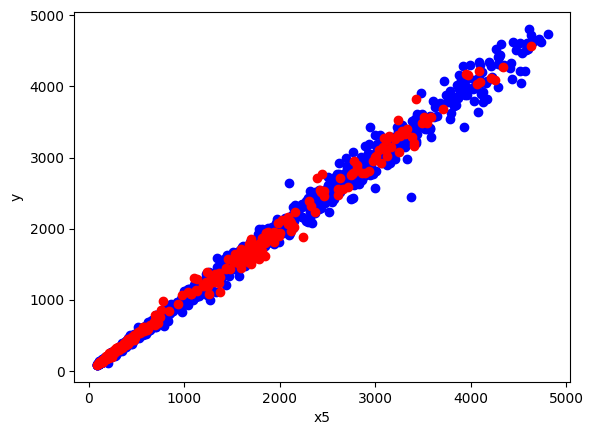

In [212]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(train.x5, train.y,  color='blue')
ax.scatter(test.x5, test.y,  color='red')
plt.xlabel("x5")
plt.ylabel("y")
plt.show()

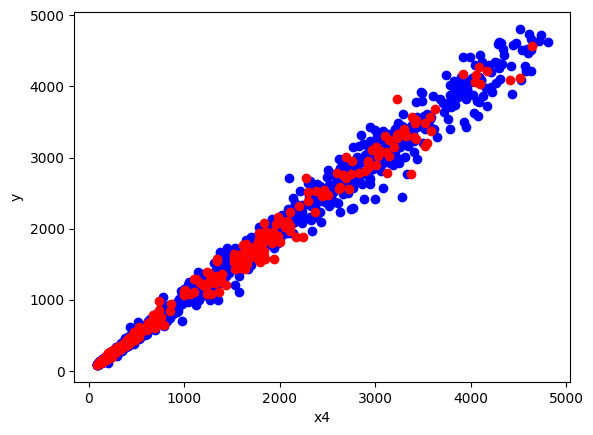

In [213]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(train.x4, train.y,  color='blue')
ax.scatter(test.x4, test.y,  color='red')
plt.xlabel("x4")
plt.ylabel("y")
plt.show()

### normalizing data

#### before norm

In [214]:
#asanyarray: converting to normal array 
train_x = np.asanyarray(train[['x1','x2','x3','x4','x5']])
train_y = np.asanyarray(train[['y']])

test_x = np.asanyarray(test[['x1','x2','x3','x4','x5']])
test_y = np.asanyarray(test[['y']])

In [215]:
train_x.shape

(1799, 5)

#### after norm

In [216]:
scaler = MinMaxScaler(feature_range = (0,1))
train_x = scaler.fit_transform(train_x)
train_y = scaler.fit_transform(train_y)

test_x = scaler.fit_transform(test_x)
test_y = scaler.fit_transform(test_y)

### training model

- Converting the data into a normal array So that it is suitable for the model format

- [link regr](https://scikit-learn.org/stable/supervised_learning.html)

In [217]:

regr = linear_model.LinearRegression()


#train_x , train_y data are fitted with together and the best line is obtained and it will be final model
regr.fit (train_x, train_y)

# The coefficients
print('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.03465825 -0.0057721   0.03924947  0.06787614  0.93051616]]
Intercept:  [0.00076395]


### model Evaluation

In [218]:

predict = regr.predict(test_x) #y_hat

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predict) )


Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 1.00


### testing

In [219]:
predict[:3]

array([[0.05276663],
       [0.05354689],
       [0.04720633]])

In [220]:
test_y[:3]

array([[0.05433531],
       [0.05512772],
       [0.04680399]])

In [221]:
predict = scaler.inverse_transform(predict)[:]
predict

array([[ 320.21238284],
       [ 323.70794677],
       [ 295.30247408],
       [ 293.14504905],
       [ 217.99250867],
       [ 254.47876596],
       [ 279.38779557],
       [ 300.45390619],
       [ 291.03292503],
       [ 296.07991591],
       [ 295.93838245],
       [ 300.89644029],
       [ 296.4669783 ],
       [ 279.24101378],
       [ 293.32564966],
       [ 291.49125794],
       [ 293.84131564],
       [ 342.12330997],
       [ 460.84394207],
       [ 448.357757  ],
       [ 401.88811867],
       [ 673.14476109],
       [ 637.54526896],
       [ 742.36412552],
       [ 918.61099261],
       [1100.17448697],
       [1118.79101816],
       [1330.88299062],
       [ 966.93675304],
       [ 820.76891704],
       [ 608.01403447],
       [ 530.62115495],
       [ 376.4362627 ],
       [ 499.32149371],
       [ 557.26750323],
       [ 670.20585124],
       [ 682.09730305],
       [ 677.93476972],
       [ 739.28917134],
       [ 713.28501996],
       [ 681.10940057],
       [ 686.096

In [222]:
test_y = scaler.inverse_transform(test_y)[:]
test_y

array([[ 327.24],
       [ 330.79],
       [ 293.5 ],
       [ 293.96],
       [ 253.  ],
       [ 294.57],
       [ 294.42],
       [ 292.22],
       [ 304.36],
       [ 298.64],
       [ 304.01],
       [ 337.96],
       [ 293.79],
       [ 297.38],
       [ 294.49],
       [ 294.71],
       [ 297.97],
       [ 354.15],
       [ 472.31],
       [ 457.63],
       [ 442.54],
       [ 679.87],
       [ 640.34],
       [ 855.28],
       [ 940.  ],
       [1133.18],
       [1291.  ],
       [1271.  ],
       [1061.  ],
       [ 841.19],
       [ 608.83],
       [ 556.88],
       [ 381.22],
       [ 533.88],
       [ 617.09],
       [ 690.85],
       [ 670.78],
       [ 779.  ],
       [ 751.75],
       [ 676.96],
       [ 697.  ],
       [ 716.16],
       [ 640.99],
       [ 586.  ],
       [ 557.19],
       [ 577.81],
       [ 609.05],
       [ 607.4 ],
       [ 605.16],
       [ 598.68],
       [ 536.49],
       [ 473.41],
       [ 454.41],
       [ 434.77],
       [ 467.38],
       [ 4

In [223]:
predict.shape

(441, 1)

### plotting

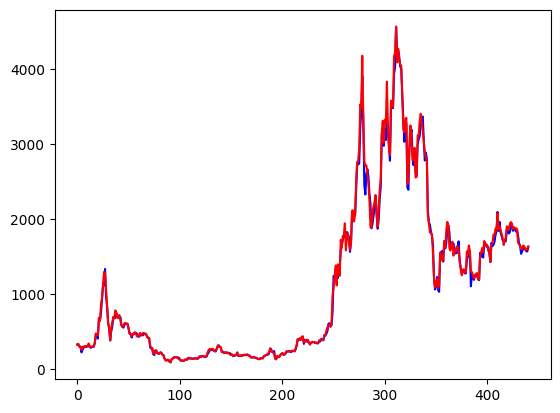

In [224]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(predict,'-b')
ax.plot(test_y,'-r')
plt.show()

### final testing 

In [225]:
test_norm = np.array([495.67
,495.11
,502.68
,533.88
,511.46

])
test_norm = test_norm.astype('float128')
test_norm = test_norm.reshape(-1,1)
test_norm.shape

(5, 1)

In [226]:
scaler_ = MinMaxScaler(feature_range = (0,1))
test_norm = scaler_.fit_transform(test_norm).reshape(1,5)
print(test_norm[:5],'\n')
print(test_norm.shape)

[[0.01444416 0.         0.19525406 1.         0.42171782]] 

(1, 5)


In [227]:
_new = regr.predict(test_norm)
_new.shape

(1, 1)

In [228]:
z_norm = np.append(test_norm,_new)
z_norm

array([0.01444416, 0.        , 0.19525406, 1.        , 0.42171782,
       0.46821835])

### final plot

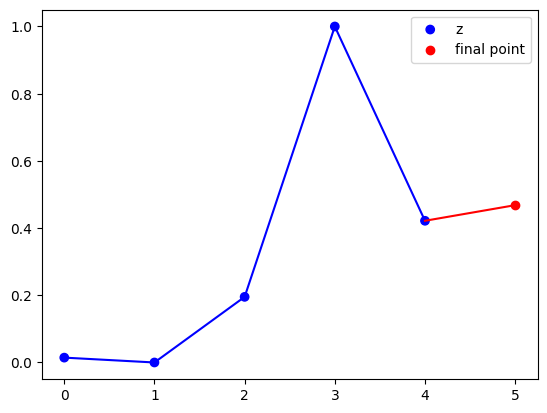

In [229]:
import matplotlib.pyplot as plt
import numpy as np


xx = np.arange(len(z_norm))

colors = ['b'] * (len(z_norm) - 1) + ['r']

plt.scatter(xx[:-1], z_norm[:-1], c=colors[:-1], label='z')
plt.scatter(xx[-1], z_norm[-1], c=colors[-1], label='final point', marker='o', edgecolors='r')

plt.plot(xx[:-1], z_norm[:-1], linestyle='-', color='b')
plt.plot(xx[-2:], z_norm[-2:], linestyle='-', color='r')  
plt.legend()
plt.show()


inverse_transform

In [230]:
x = scaler.inverse_transform(test_norm)

In [231]:
y = scaler.inverse_transform(_new)

In [232]:
y

array([[2181.4194735]])

In [233]:
z = np.append(x,y)
z

array([ 148.52924942,   83.82      ,  958.55038948, 4563.78      ,
       1973.09897859, 2181.4194735 ])

### final plot

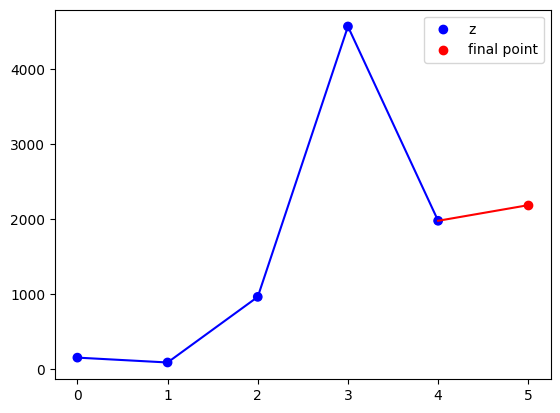

In [234]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(z))

colors = ['b'] * (len(z) - 1) + ['r']

plt.scatter(x[:-1], z[:-1], c=colors[:-1], label='z')
plt.scatter(x[-1], z[-1], c=colors[-1], label='final point', marker='o', edgecolors='r')

plt.plot(x[:-1], z[:-1], linestyle='-', color='b')
plt.plot(x[-2:], z[-2:], linestyle='-', color='r')
plt.legend()
plt.show()


### extracting model

In [235]:
model = joblib.dump(regr, 'model.pkl')
model

['model.pkl']

In [236]:
loaded_model = joblib.load('model.pkl')

print('Coefficients: ', loaded_model.coef_)
print ('Intercept: ',loaded_model.intercept_)

Coefficients:  [[-0.03465825 -0.0057721   0.03924947  0.06787614  0.93051616]]
Intercept:  [0.00076395]
